In [1]:
from keras import models , layers , utils
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


train_dir = "src/train"
val_dir = "src/train_smal"

BATCH_SZIZE = 128

IMG_SIZE = (160, 160)

train_images = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SZIZE,
                                                            image_size=IMG_SIZE
                                                            )


test_images = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SZIZE,
                                                                 image_size=IMG_SIZE
                                                                 )



# Normalize pixel values to be between 0 and 1
#train_images, test_images = train_images / 255.0, test_images / 255.0



classes = ["0","1","2","3","4","5","6"]
#class_names = ["angry","disgust","fear","happy","neutral","sad","surprised"]


# plt.figure(figsize=(10,10))
# for i in range(32):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[0][i])
#     # The CIFAR labels happen to be arrays,
#     # which is why you need the extra index
#     plt.xlabel(class_names[classes[i][0]])
# plt.show()


model = models.Sequential()
model.add(layers.InputLayer(input_shape=(160,160,3)))
model.add(layers.Rescaling(scale=1./255.))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(7 , activation="softmax"))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

history = model.fit(train_images, epochs=15,
                     validation_data=test_images)




Found 28709 files belonging to 7 classes.
Metal device set to: Apple M1


2022-05-04 23:28:12.104238: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-04 23:28:12.104524: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 6459 files belonging to 7 classes.


In [8]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, verbose=2)

NameError: name 'history' is not defined

In [4]:
#model_val_accuracy = history.history['val_accuracy'][-1]
#model.save("NewCNN"+str(model_val_accuracy) + "_model.h5")
model = tf.keras.models.load_model('NewCNN0.7002632021903992_model.h5')

In [9]:
history = model.fit(train_images, epochs=10,
                    validation_data=test_images)
totalEpochs = 20

Epoch 1/10


2022-05-04 23:30:36.874362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - ETA: 0s - loss: 0.8266 - accuracy: 0.6767

2022-05-04 23:33:14.366833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - 167s 736ms/step - loss: 0.8266 - accuracy: 0.6767 - val_loss: 0.6836 - val_accuracy: 0.7387
Epoch 2/10
225/225 [==============================] - 141s 626ms/step - loss: 0.7671 - accuracy: 0.7036 - val_loss: 0.6609 - val_accuracy: 0.7715
Epoch 3/10
225/225 [==============================] - 135s 599ms/step - loss: 0.7306 - accuracy: 0.7172 - val_loss: 0.5650 - val_accuracy: 0.8074
Epoch 4/10
225/225 [==============================] - 134s 594ms/step - loss: 0.6880 - accuracy: 0.7324 - val_loss: 0.5594 - val_accuracy: 0.8156
Epoch 5/10
225/225 [==============================] - 134s 594ms/step - loss: 0.6614 - accuracy: 0.7400 - val_loss: 0.4916 - val_accuracy: 0.8415
Epoch 6/10
225/225 [==============================] - 133s 589ms/step - loss: 0.6219 - accuracy: 0.7569 - val_loss: 0.4682 - val_accuracy: 0.8556
Epoch 7/10
225/225 [==============================] - 132s 587ms/step - loss: 0.6096 - accuracy: 0.7590 - val_loss: 0.4543 - val_accura

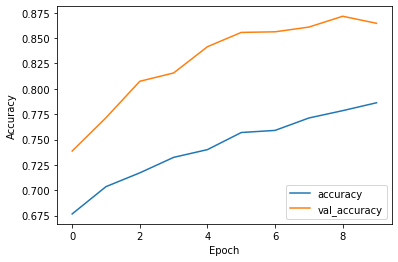

In [10]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images, verbose=2)

Epoch 1/10
225/225 [==============================] - 130s 578ms/step - loss: 0.5280 - accuracy: 0.7931 - val_loss: 0.3771 - val_accuracy: 0.8802
Epoch 2/10
225/225 [==============================] - 129s 574ms/step - loss: 0.5136 - accuracy: 0.7979 - val_loss: 0.3509 - val_accuracy: 0.8930
Epoch 3/10
225/225 [==============================] - 130s 576ms/step - loss: 0.4929 - accuracy: 0.8077 - val_loss: 0.3789 - val_accuracy: 0.8837
Epoch 4/10
225/225 [==============================] - 129s 575ms/step - loss: 0.4848 - accuracy: 0.8095 - val_loss: 0.3284 - val_accuracy: 0.9020
Epoch 5/10
225/225 [==============================] - 129s 573ms/step - loss: 0.4829 - accuracy: 0.8121 - val_loss: 0.3245 - val_accuracy: 0.9105
Epoch 6/10
225/225 [==============================] - 129s 573ms/step - loss: 0.4774 - accuracy: 0.8130 - val_loss: 0.3141 - val_accuracy: 0.9063
Epoch 7/10
225/225 [==============================] - 129s 572ms/step - loss: 0.4649 - accuracy: 0.8167 - val_loss: 0.2965 -

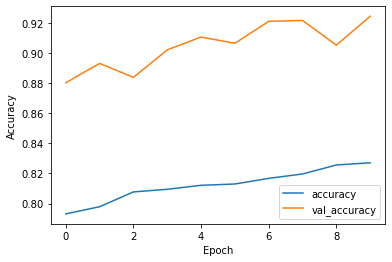

In [11]:
model_val_accuracy = history.history['val_accuracy'][-1]
model.save("NewCNN_Phase2" + str(model_val_accuracy) + "_model.h5")
#new_model = tf.keras.models.load_model('')
history = model.fit(train_images, epochs=10,
                    validation_data=test_images)
totalEpochs = 30

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images, verbose=2)

Epoch 1/10
225/225 [==============================] - 146s 645ms/step - loss: 0.4269 - accuracy: 0.8343 - val_loss: 0.2672 - val_accuracy: 0.9274
Epoch 2/10
225/225 [==============================] - 142s 631ms/step - loss: 0.4254 - accuracy: 0.8358 - val_loss: 0.2743 - val_accuracy: 0.9195
Epoch 3/10
225/225 [==============================] - 143s 635ms/step - loss: 0.4074 - accuracy: 0.8422 - val_loss: 0.2542 - val_accuracy: 0.9344
Epoch 4/10
225/225 [==============================] - 142s 631ms/step - loss: 0.4085 - accuracy: 0.8415 - val_loss: 0.2691 - val_accuracy: 0.9243
Epoch 5/10
225/225 [==============================] - 143s 635ms/step - loss: 0.4084 - accuracy: 0.8411 - val_loss: 0.2477 - val_accuracy: 0.9303
Epoch 6/10
225/225 [==============================] - 143s 634ms/step - loss: 0.4073 - accuracy: 0.8428 - val_loss: 0.2450 - val_accuracy: 0.9320
Epoch 7/10
225/225 [==============================] - 143s 637ms/step - loss: 0.3897 - accuracy: 0.8483 - val_loss: 0.2462 -

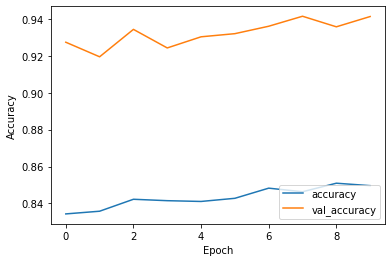

In [13]:
model_val_accuracy = history.history['val_accuracy'][-1]
model.save("NewCNN_Phase3" + str(model_val_accuracy) + "_model.h5")
#new_model = tf.keras.models.load_model('')
history = model.fit(train_images, epochs=10,
                    validation_data=test_images)
totalEpochs = 40

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images, verbose=2)

In [12]:
test_images2 = tf.keras.utils.image_dataset_from_directory("src/train_smal",
                                                          shuffle=True,
                                                          batch_size=BATCH_SZIZE,
                                                          image_size=IMG_SIZE
                                                          )
model.evaluate(test_images2)

Found 6459 files belonging to 7 classes.
51/51 [==============================] - 10s 180ms/step - loss: 0.2847 - accuracy: 0.9243


[0.2847065031528473, 0.9242916703224182]

In [4]:

test_images2 = tf.keras.utils.image_dataset_from_directory("/Users/anasarodake/anas_fotos/test",
                                                           shuffle=True,
                                                           batch_size=BATCH_SZIZE,
                                                           image_size=IMG_SIZE
                                                           )
model.evaluate(test_images2)

Found 550 files belonging to 2 classes.
18/18 [==============================] - 1s 60ms/step - loss: 0.7797 - accuracy: 0.6618


[0.7797353863716125, 0.6618182063102722]

In [17]:
test_images2 = tf.keras.utils.image_dataset_from_directory("src/train_smal",
                                                           shuffle=True,
                                                           batch_size=BATCH_SZIZE,
                                                           image_size=IMG_SIZE
                                                           )
model.evaluate(test_images2)

Found 6459 files belonging to 7 classes.
51/51 [==============================] - 10s 188ms/step - loss: 0.2403 - accuracy: 0.9413


[0.2403164952993393, 0.9413222074508667]

In [21]:
test_images2 = 0
test_images2 = tf.keras.utils.image_dataset_from_directory("/Users/anasarodake/anas_fotos/train",
                                                           shuffle=True,
                                                           batch_size=BATCH_SZIZE,
                                                           image_size=IMG_SIZE
                                                           )
model.evaluate(test_images2)

Found 550 files belonging to 2 classes.
5/5 [==============================] - 1s 200ms/step - loss: 23.7267 - accuracy: 0.0236


[23.72673225402832, 0.023636363446712494]

In [22]:
model_val_accuracy = history.history['val_accuracy'][-1]
model.save("NewCNN_Phase4" + str(model_val_accuracy) + "_model.h5")
#new_model = tf.keras.models.load_model('')

In [33]:
model1 = tf.keras.models.load_model("NewCNN0.7002632021903992_model.h5")
model2 = tf.keras.models.load_model("NewCNN_Phase20.8645301461219788_model.h5")
model3 = tf.keras.models.load_model("NewCNN_Phase30.9242916703224182_model.h5")
model4 = tf.keras.models.load_model("NewCNN_Phase40.9413222074508667_model.h5")

In [106]:
test_images2 = 0
test_images2 = tf.keras.utils.image_dataset_from_directory("src/train_smal",
                                                           shuffle=True,
                                                           batch_size=BATCH_SZIZE,
                                                           image_size=IMG_SIZE
                                                           )
print("Ergebnisse des Models 1" , model1.evaluate(test_images2))
print("Ergebnisse des Models 2" , model2.evaluate(test_images2))
print("Ergebnisse des Models 3" , model3.evaluate(test_images2))
print("Ergebnisse des Models 4" , model4.evaluate(test_images2))

Found 6459 files belonging to 7 classes.
51/51 [==============================] - 11s 199ms/step - loss: 0.7730 - accuracy: 0.7003
Ergebnisse des Models 1 [0.7729753255844116, 0.7002632021903992]
51/51 [==============================] - 9s 182ms/step - loss: 0.4062 - accuracy: 0.8645
Ergebnisse des Models 2 [0.40621137619018555, 0.8645301461219788]
51/51 [==============================] - 9s 178ms/step - loss: 0.2847 - accuracy: 0.9243
Ergebnisse des Models 3 [0.2847064435482025, 0.9242916703224182]
51/51 [==============================] - 10s 195ms/step - loss: 0.2403 - accuracy: 0.9413
Ergebnisse des Models 4 [0.24031643569469452, 0.9413222074508667]


In [40]:
type(test_images2)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [42]:
test_images2.batch

<bound method DatasetV2.batch of <BatchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>>

In [127]:
import cv2
img = cv2.imread("deleteMe/6.png")
img = cv2.resize(img ,(160,160))
img = img.reshape(1,160,160,3)
#img = img/255.

In [128]:
model1.predict(img , batch_size = 1)

array([[0.04066081, 0.00079379, 0.07129534, 0.5282053 , 0.27170736,
        0.05938726, 0.0279502 ]], dtype=float32)

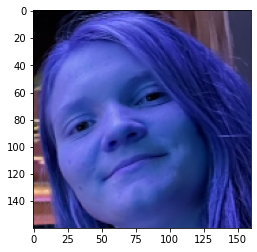

In [131]:
plt.imshow(img[0] )
plt.show()

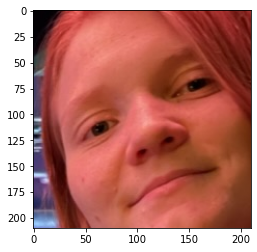

neutral


In [139]:
import numpy as np

classes = ["0","1","2","3","4","5","6"]
class_names = ["angry","disgust","fear","happy","neutral","sad","surprised"]

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
frame = cv2.imread("deleteMe/5.jpeg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
    roi_gray = gray[y:y + h, x: x + w]
    roi_color = frame[y:y + h, x: x + w]
    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 11, 55), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:  #show found faces and the predicted emotions
            face_roi = roi_color[ey: ey + eh, ex: ex + ew]
            plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))
            plt.show()
            final_image = cv2.resize(face_roi, (160, 160))
            final_image = np.expand_dims(final_image, axis=0)  #need 4th Dimention
            #final_image = final_image / 255.0  #normalize
            predictions = model4.predict(final_image)
            print(class_names[np.argmax(predictions)])

In [147]:
font = cv2.FONT_HERSHEY_PLAIN
#set the rectangle background to white
rectangle_bgr = (255, 255, 255)
#make a black image
img = np.zeros((500, 500))
#set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=1.5, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
#make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=1.5, color=(0, 0, 0), thickness=1)
cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")


while True:
    ret, frame = cap.read()
    #eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            continue
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew] ## cropping the face

        final_image = cv2.resize(face_roi, (160,160))
        final_image = np.expand_dims(final_image,axis=0) ## need fourth dimension
        #final_image = final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = model4.predict(final_image)
    #font = cv2.FONT_HERSHEY_PLAIN


    #show the name of predicted emotion
    status = class_names[np.argmax(Predictions)]
    x1,y1,w1,h1 = 0,0,175,75
    #Draw black background rectangle
    cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    #Addd text
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    cv2.putText(frame, status,(100,150),font, 3,(0, 0, 255),2,cv2.LINE_4)
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 0, 255))

    cv2.imshow('Face Emotion Recognition', frame)
    if cv2.waitKey(2) & 0xFF == ord('q') :
        break

cap.release()
cv2.destroyAllWindows()


OpenCV: out device of bound (0-0): 1
OpenCV: camera failed to properly initialize!


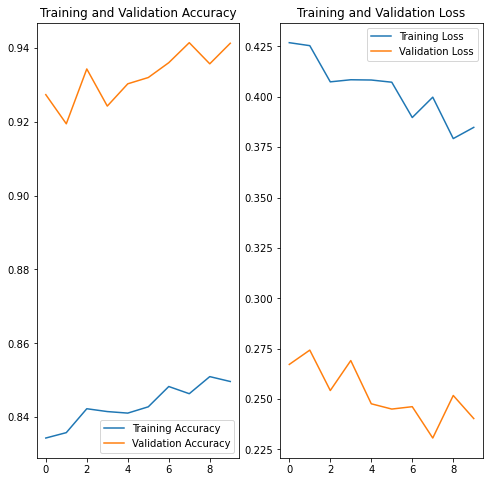